# MLP
Cell line 12 GM12878

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There were no learn fails during CV.

MCC mean 0.2332

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 15:12:15.563689


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=12]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14]


2023-04-29 15:12:18.289348
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1905
Num RCI: 1905
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1905 sequences.

Training # 1 1
2023-04-29 15:12:26.890677
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-2.343476818064999, -0.25678962141498185]
Variances [2.14298713 1.280931  ]
Priors [0.42509782 0.57490218]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 956:564 62.89%
Computed class weights: {0: 1.3475177304964538, 1: 0.7949790794979079}
Valid 1:0 236:149 61.30%
FIT


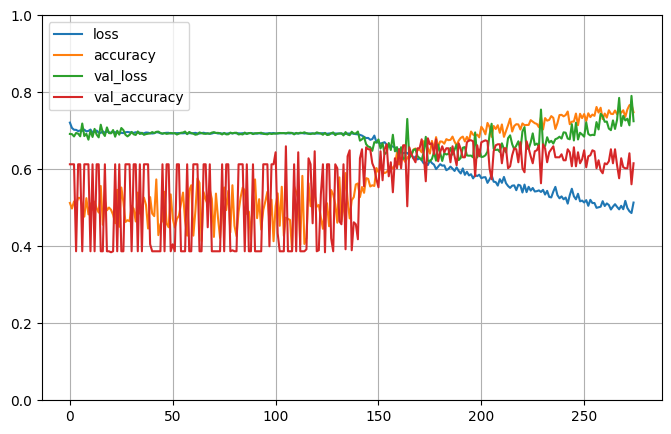


Testing # 1 1
2023-04-29 15:13:53.665124
PREDICT
Test 1:0 236:149 61.30%
Predict 1:0 261:124 67.79%
Test sizes (385, 1025) (385,)
Distrib of scores: 0.5879639 mean 0.15767182 std
Range of scores: 0.1879006 to 0.92786306
Score threshold 0.5
Confusion matrix
 [[ 75  74]
 [ 49 187]]
Normalized matrix
 [[0.19480519 0.19220779]
 [0.12727273 0.48571429]]
Extreme scores correct, pos:neg 107 19
Extreme scores incorrect pos:neg 33 7


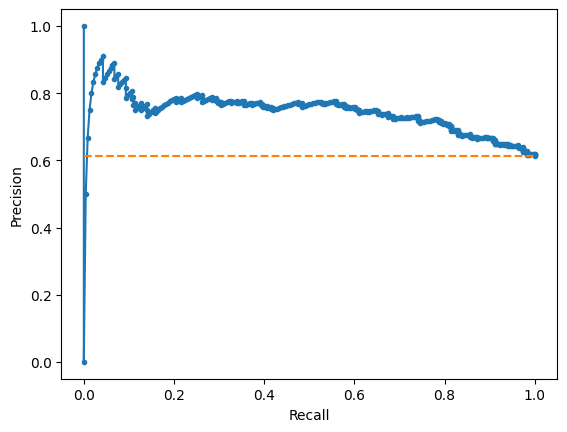

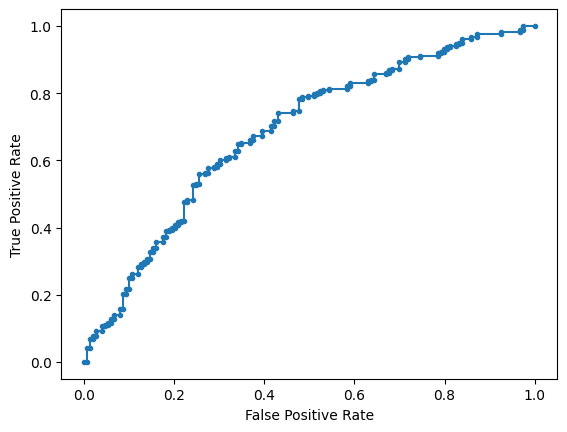

Accuracy: 68.05% Precision: 71.65% Recall: 79.24%
F1: 75.25% MCC: 0.3083
AUPRC: 74.32% AUROC: 68.41%
 accuracy [68.05194805194805]
 precision [71.64750957854406]
 recall [79.23728813559322]
 F1 [75.25150905432595]
 MCC [0.3082558634789215]
 AUPRC [74.32032263327363]
 AUROC [68.4108747582755]

Training # 1 2
2023-04-29 15:13:54.325228
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-0.32580834401564734, -2.317148050542419]
Variances [1.26716494 2.25021165]
Priors [0.58108919 0.41891081]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 966:542 64.06%
Computed class weights: {0: 1.3911439114391144, 1: 0.7805383022774327}
Valid 1:0 258:139 64.99%
FIT


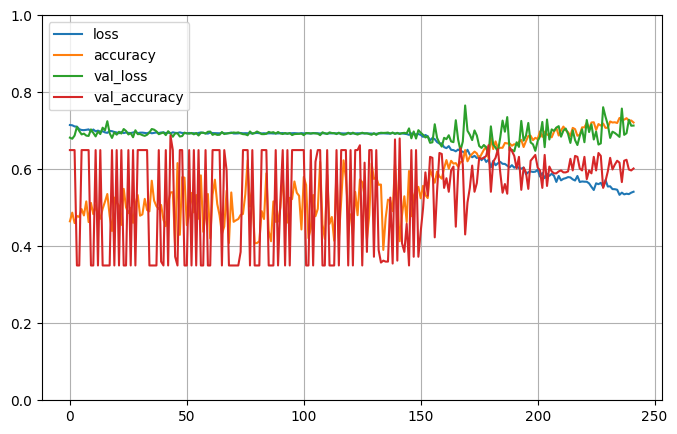


Testing # 1 2
2023-04-29 15:15:05.096481
PREDICT
Test 1:0 258:139 64.99%
Predict 1:0 339:58 85.39%
Test sizes (397, 1025) (397,)
Distrib of scores: 0.50180614 mean 0.0017997613 std
Range of scores: 0.49818093 to 0.5083137
Score threshold 0.5
Confusion matrix
 [[ 35 104]
 [ 23 235]]
Normalized matrix
 [[0.08816121 0.26196474]
 [0.05793451 0.59193955]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


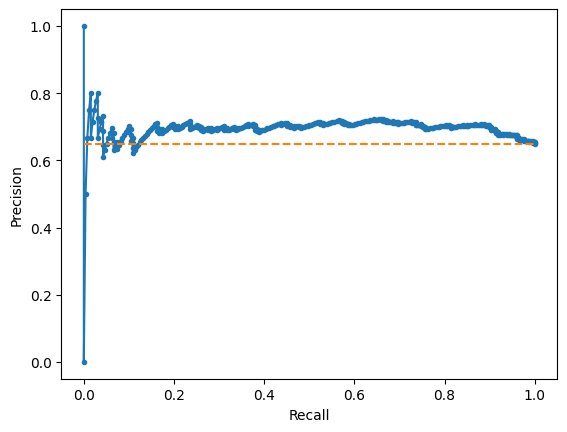

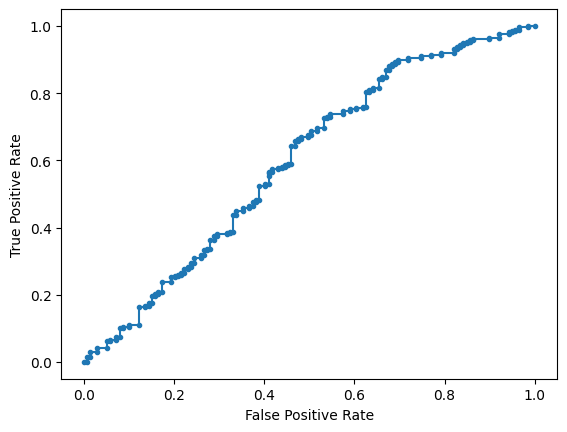

Accuracy: 68.01% Precision: 69.32% Recall: 91.09%
F1: 78.73% MCC: 0.2197
AUPRC: 69.49% AUROC: 59.80%
 accuracy [68.01007556675063]
 precision [69.32153392330383]
 recall [91.08527131782945]
 F1 [78.72696817420434]
 MCC [0.21966500641289688]
 AUPRC [69.4947325504305]
 AUROC [59.79588422285427]

Training # 1 3
2023-04-29 15:15:05.713519
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.27399362168560853, -2.3490581354218487]
Variances [1.2696495  2.12831087]
Priors [0.58686271 0.41313729]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 980:560 63.64%
Computed class weights: {0: 1.375, 1: 0.7857142857142857}
Valid 1:0 227:138 62.19%
FIT


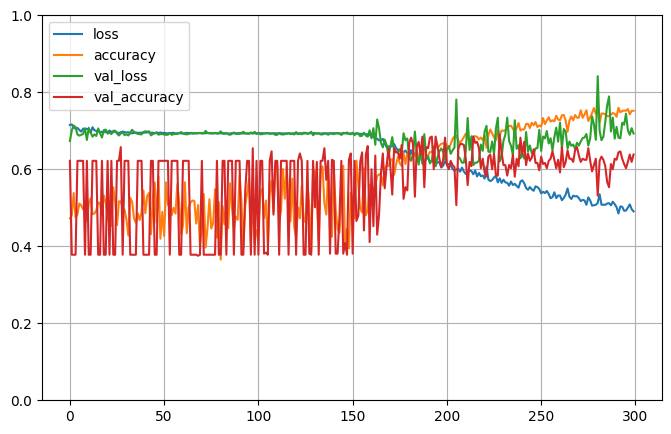


Testing # 1 3
2023-04-29 15:16:34.650400
PREDICT
Test 1:0 227:138 62.19%
Predict 1:0 237:128 64.93%
Test sizes (365, 1025) (365,)
Distrib of scores: 0.58109003 mean 0.24958009 std
Range of scores: 0.012379144 to 0.99659926
Score threshold 0.5
Confusion matrix
 [[ 67  71]
 [ 61 166]]
Normalized matrix
 [[0.18356164 0.19452055]
 [0.16712329 0.45479452]]
Extreme scores correct, pos:neg 117 47
Extreme scores incorrect pos:neg 38 32


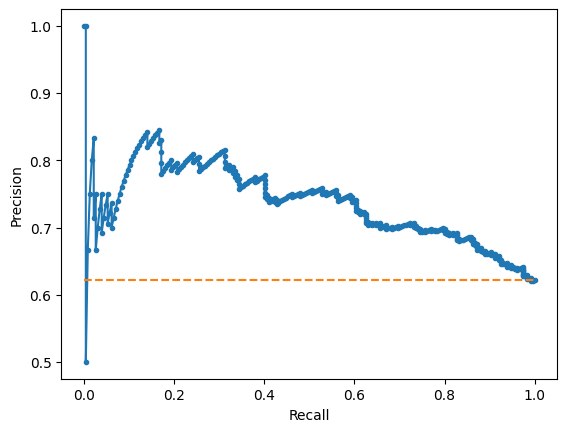

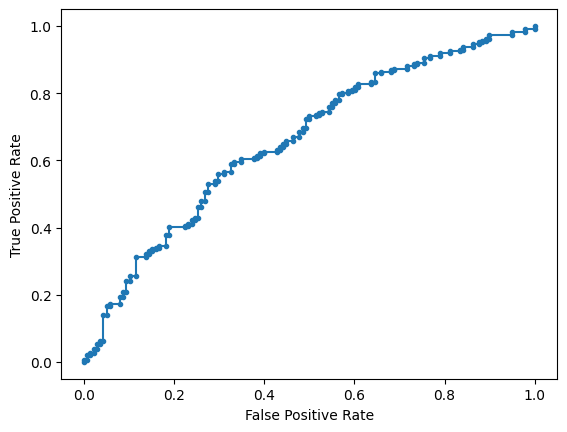

Accuracy: 63.84% Precision: 70.04% Recall: 73.13%
F1: 71.55% MCC: 0.2203
AUPRC: 73.58% AUROC: 65.80%
 accuracy [63.83561643835617]
 precision [70.042194092827]
 recall [73.12775330396477]
 F1 [71.55172413793103]
 MCC [0.22029371194368416]
 AUPRC [73.58327794952399]
 AUROC [65.79518610738684]

Training # 1 4
2023-04-29 15:16:35.278171
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-2.364822422781093, -0.31725018757337653]
Variances [2.16683492 1.21904879]
Priors [0.42015093 0.57984907]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 966:557 63.43%
Computed class weights: {0: 1.367145421903052, 1: 0.7883022774327122}
Valid 1:0 251:131 65.71%
FIT


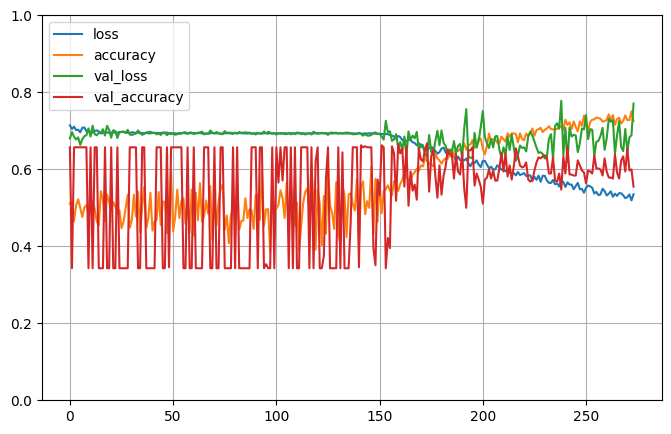


Testing # 1 4
2023-04-29 15:17:55.534023
PREDICT
Test 1:0 251:131 65.71%
Predict 1:0 308:74 80.63%
Test sizes (382, 1025) (382,)
Distrib of scores: 0.59204376 mean 0.10304154 std
Range of scores: 0.34249148 to 0.8548749
Score threshold 0.5
Confusion matrix
 [[ 39  92]
 [ 35 216]]
Normalized matrix
 [[0.10209424 0.2408377 ]
 [0.09162304 0.56544503]]
Extreme scores correct, pos:neg 87 0
Extreme scores incorrect pos:neg 22 1


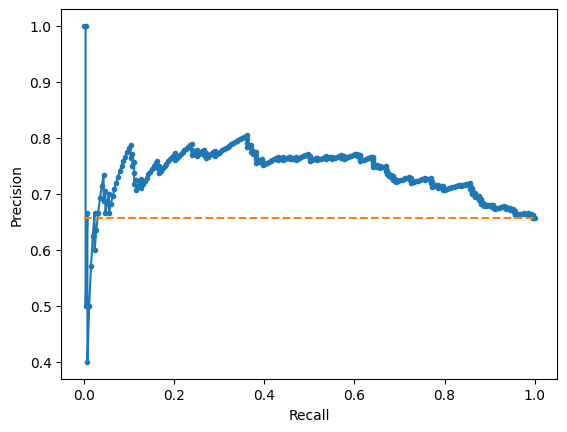

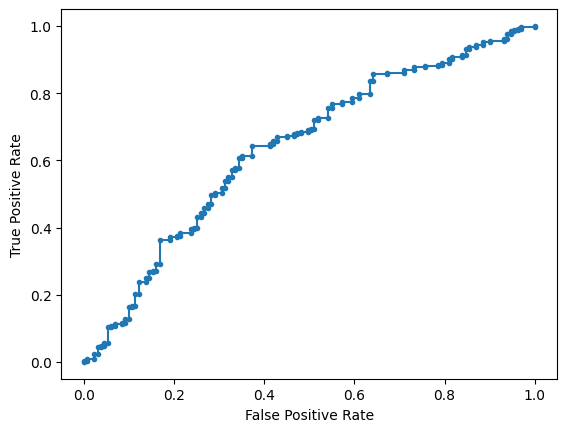

Accuracy: 66.75% Precision: 70.13% Recall: 86.06%
F1: 77.28% MCC: 0.1901
AUPRC: 73.65% AUROC: 63.86%
 accuracy [66.75392670157068]
 precision [70.12987012987013]
 recall [86.05577689243027]
 F1 [77.28085867620752]
 MCC [0.19009625504118854]
 AUPRC [73.65071085140833]
 AUROC [63.85754691159029]

Training # 1 5
2023-04-29 15:17:56.218173
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-2.348859474686921, -0.2802786405923956]
Variances [2.11379894 1.26781211]
Priors [0.42066052 0.57933948]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 968:561 63.31%
Computed class weights: {0: 1.3627450980392157, 1: 0.7897727272727273}
Valid 1:0 234:142 62.23%
FIT


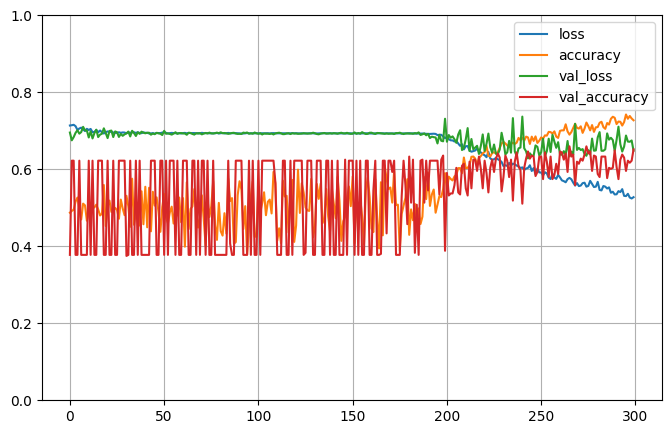


Testing # 1 5
2023-04-29 15:19:23.508996
PREDICT
Test 1:0 234:142 62.23%
Predict 1:0 279:97 74.20%
Test sizes (376, 1025) (376,)
Distrib of scores: 0.6175127 mean 0.21077028 std
Range of scores: 0.02702026 to 0.97480816
Score threshold 0.5
Confusion matrix
 [[ 54  88]
 [ 43 191]]
Normalized matrix
 [[0.14361702 0.23404255]
 [0.1143617  0.50797872]]
Extreme scores correct, pos:neg 128 25
Extreme scores incorrect pos:neg 46 20


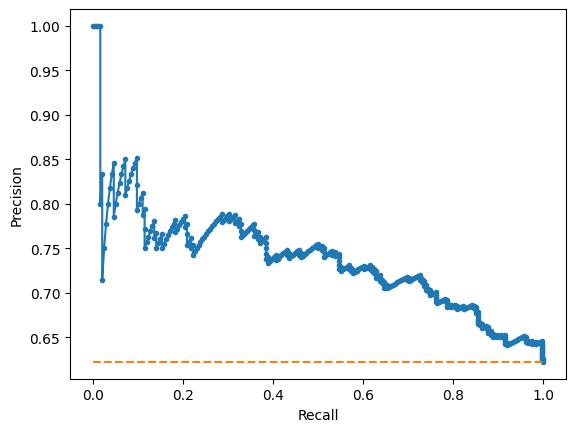

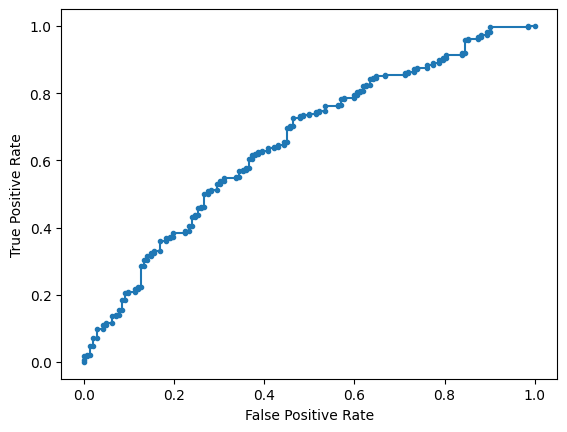

Accuracy: 65.16% Precision: 68.46% Recall: 81.62%
F1: 74.46% MCC: 0.2178
AUPRC: 73.70% AUROC: 65.30%
 accuracy [65.1595744680851]
 precision [68.45878136200717]
 recall [81.62393162393163]
 F1 [74.46393762183237]
 MCC [0.2177574948396976]
 AUPRC [73.7033560074028]
 AUROC [65.30335861321777]

Training # 2 1
2023-04-29 15:19:24.227803
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-0.275812484120879, -2.2932516170972104]
Variances [1.25841541 2.17985607]
Priors [0.57304419 0.42695581]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 946:570 62.40%
Computed class weights: {0: 1.3298245614035087, 1: 0.8012684989429175}
Valid 1:0 245:144 62.98%
FIT


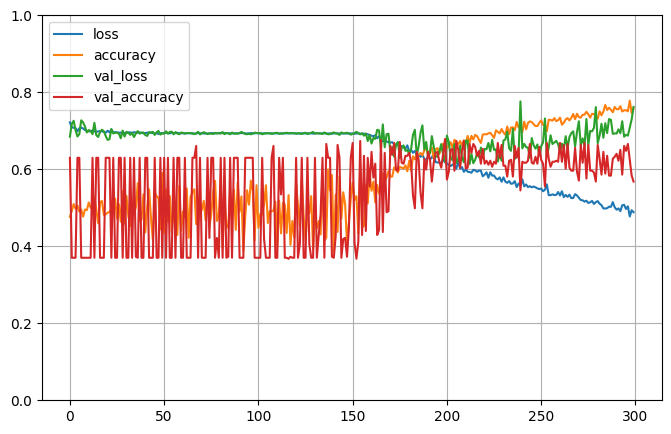


Testing # 2 1
2023-04-29 15:21:51.441394
PREDICT
Test 1:0 245:144 62.98%
Predict 1:0 270:119 69.41%
Test sizes (389, 1025) (389,)
Distrib of scores: 0.57860786 mean 0.14243041 std
Range of scores: 0.20260133 to 0.88066787
Score threshold 0.5
Confusion matrix
 [[ 69  75]
 [ 50 195]]
Normalized matrix
 [[0.17737789 0.19280206]
 [0.1285347  0.50128535]]
Extreme scores correct, pos:neg 101 18
Extreme scores incorrect pos:neg 24 8


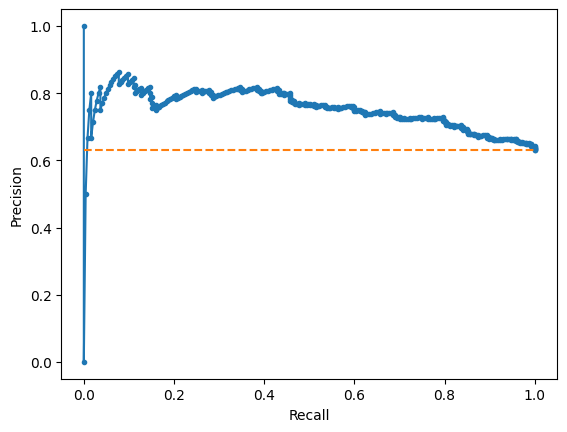

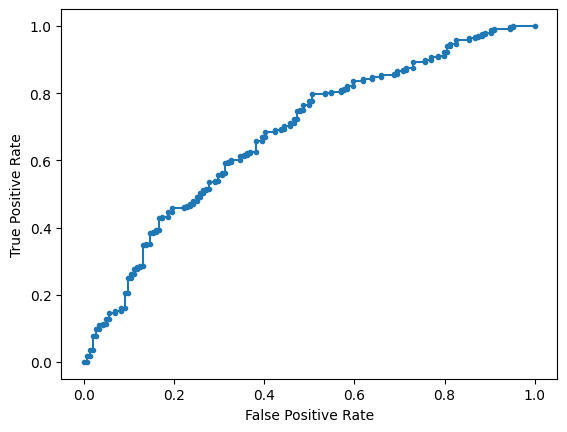

Accuracy: 67.87% Precision: 72.22% Recall: 79.59%
F1: 75.73% MCC: 0.2883
AUPRC: 75.30% AUROC: 67.89%
 accuracy [67.86632390745501]
 precision [72.22222222222221]
 recall [79.59183673469387]
 F1 [75.72815533980582]
 MCC [0.2882543625009717]
 AUPRC [75.30400472741749]
 AUROC [67.89399092970521]

Training # 2 2
2023-04-29 15:21:52.282864
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-0.3135298981525925, -2.376857718498998]
Variances [1.31865971 2.27940582]
Priors [0.60071118 0.39928882]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1011:497 67.04%
Computed class weights: {0: 1.517102615694165, 1: 0.7457962413452027}
Valid 1:0 249:148 62.72%
FIT


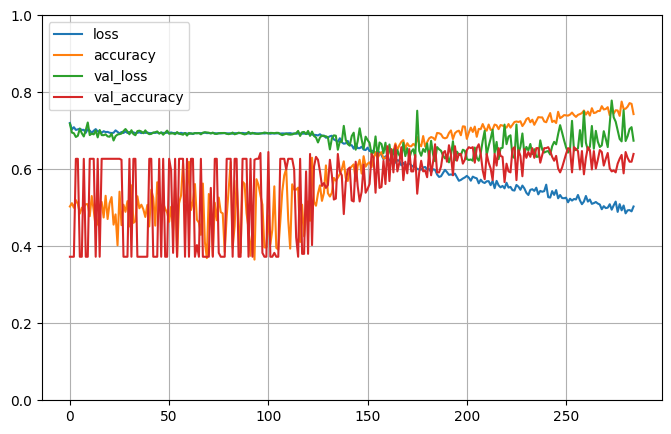


Testing # 2 2
2023-04-29 15:24:19.236043
PREDICT
Test 1:0 249:148 62.72%
Predict 1:0 274:123 69.02%
Test sizes (397, 1025) (397,)
Distrib of scores: 0.5811909 mean 0.1716812 std
Range of scores: 0.07742753 to 0.92003727
Score threshold 0.5
Confusion matrix
 [[ 69  79]
 [ 54 195]]
Normalized matrix
 [[0.17380353 0.19899244]
 [0.13602015 0.49118388]]
Extreme scores correct, pos:neg 110 21
Extreme scores incorrect pos:neg 32 14


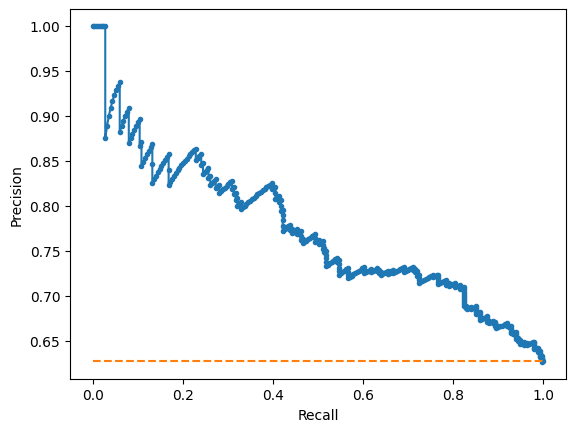

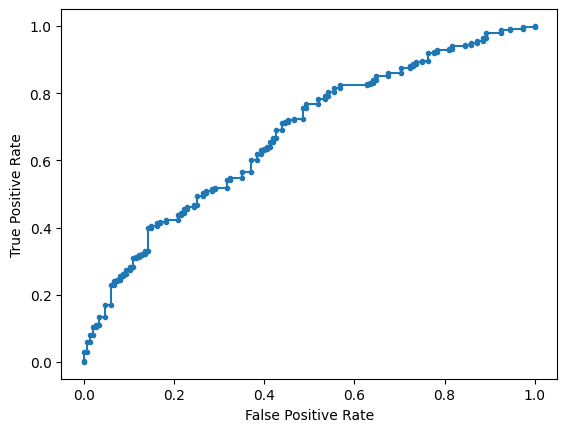

Accuracy: 66.50% Precision: 71.17% Recall: 78.31%
F1: 74.57% MCC: 0.2607
AUPRC: 77.22% AUROC: 67.56%
 accuracy [66.49874055415617]
 precision [71.16788321167883]
 recall [78.3132530120482]
 F1 [74.56978967495219]
 MCC [0.26074133401541116]
 AUPRC [77.22080300866793]
 AUROC [67.5594268967763]

Training # 2 3
2023-04-29 15:24:20.166766
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-0.2826394414486927, -2.3434242716337614]
Variances [1.16568436 2.10192898]
Priors [0.55735156 0.44264844]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 923:609 60.25%
Computed class weights: {0: 1.257799671592775, 1: 0.8299024918743229}
Valid 1:0 249:124 66.76%
FIT


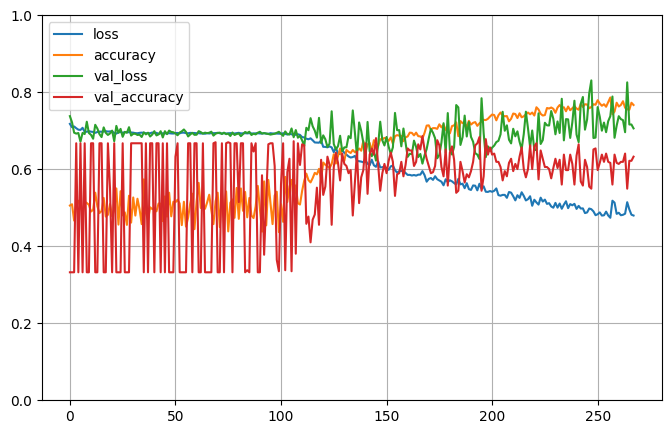


Testing # 2 3
2023-04-29 15:25:47.402287
PREDICT
Test 1:0 249:124 66.76%
Predict 1:0 320:53 85.79%
Test sizes (373, 1025) (373,)
Distrib of scores: 0.66837883 mean 0.15118434 std
Range of scores: 0.20565325 to 0.93144757
Score threshold 0.5
Confusion matrix
 [[ 30  94]
 [ 23 226]]
Normalized matrix
 [[0.08042895 0.25201072]
 [0.0616622  0.60589812]]
Extreme scores correct, pos:neg 161 8
Extreme scores incorrect pos:neg 53 6


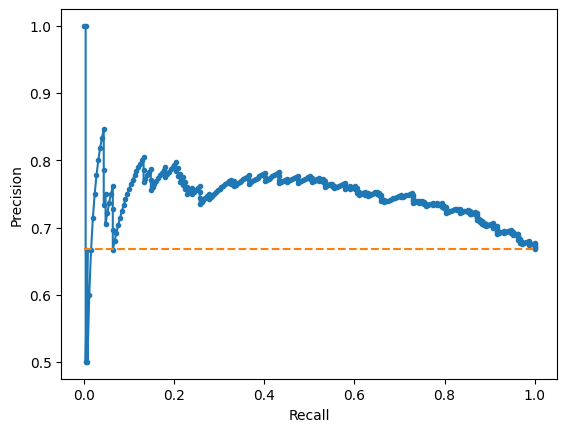

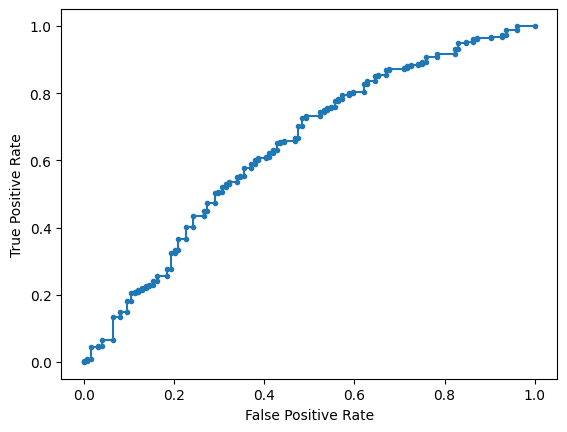

Accuracy: 68.63% Precision: 70.62% Recall: 90.76%
F1: 79.44% MCC: 0.2018
AUPRC: 74.72% AUROC: 63.95%
 accuracy [68.63270777479893]
 precision [70.625]
 recall [90.76305220883533]
 F1 [79.43760984182776]
 MCC [0.20180433375586873]
 AUPRC [74.71993352492326]
 AUROC [63.94610700867989]

Training # 2 4
2023-04-29 15:25:48.046652
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-0.2198579798195669, -2.3038168502299317]
Variances [1.24239614 2.01322525]
Priors [0.56728668 0.43271332]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 950:590 61.69%
Computed class weights: {0: 1.305084745762712, 1: 0.8105263157894737}
Valid 1:0 209:156 57.26%
FIT


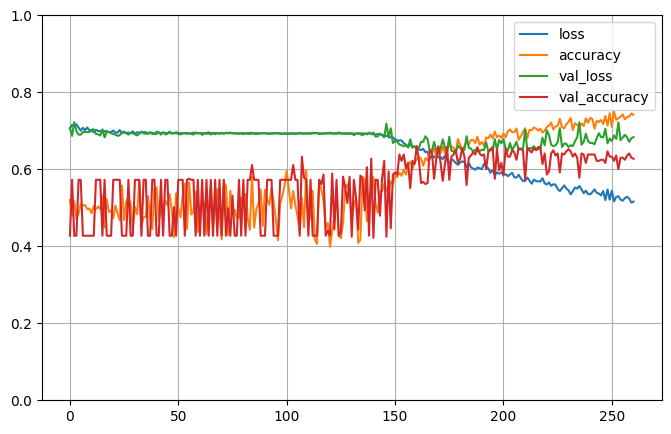


Testing # 2 4
2023-04-29 15:27:12.247752
PREDICT
Test 1:0 209:156 57.26%
Predict 1:0 283:82 77.53%
Test sizes (365, 1025) (365,)
Distrib of scores: 0.57365763 mean 0.09600975 std
Range of scores: 0.33515406 to 0.8100355
Score threshold 0.5
Confusion matrix
 [[ 57  99]
 [ 25 184]]
Normalized matrix
 [[0.15616438 0.27123288]
 [0.06849315 0.50410959]]
Extreme scores correct, pos:neg 62 2
Extreme scores incorrect pos:neg 22 1


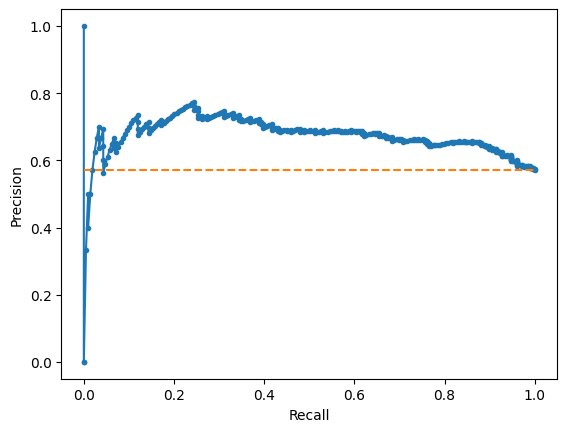

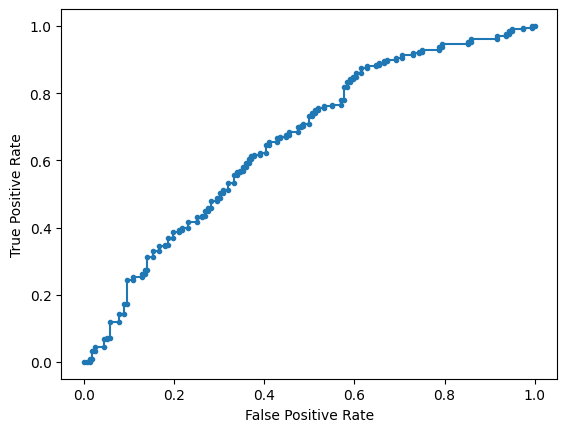

Accuracy: 66.03% Precision: 65.02% Recall: 88.04%
F1: 74.80% MCC: 0.2913
AUPRC: 67.38% AUROC: 65.79%
 accuracy [66.02739726027397]
 precision [65.01766784452296]
 recall [88.03827751196172]
 F1 [74.79674796747969]
 MCC [0.2913127926428756]
 AUPRC [67.38190907121147]
 AUROC [65.79254079254078]

Training # 2 5
2023-04-29 15:27:12.859532
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-0.328673115998635, -2.3592871141296325]
Variances [1.28760207 2.24733184]
Priors [0.58486766 0.41513234]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 980:544 64.30%
Computed class weights: {0: 1.400735294117647, 1: 0.7775510204081633}
Valid 1:0 253:128 66.40%
FIT


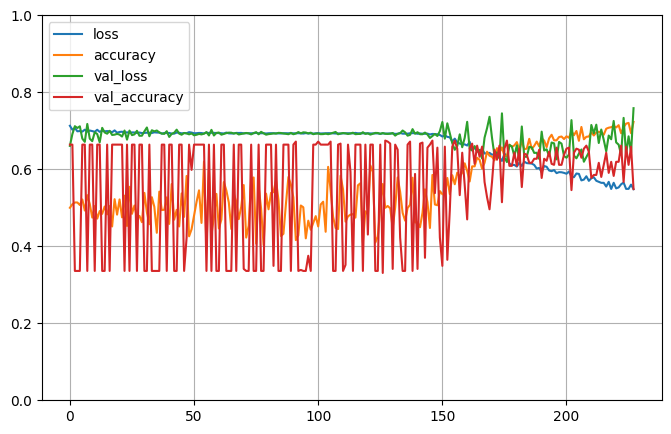


Testing # 2 5
2023-04-29 15:28:37.102794
PREDICT
Test 1:0 253:128 66.40%
Predict 1:0 359:22 94.23%
Test sizes (381, 1025) (381,)
Distrib of scores: 0.5009095 mean 0.0006335685 std
Range of scores: 0.49946922 to 0.50298524
Score threshold 0.5
Confusion matrix
 [[ 13 115]
 [  9 244]]
Normalized matrix
 [[0.03412073 0.30183727]
 [0.02362205 0.64041995]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


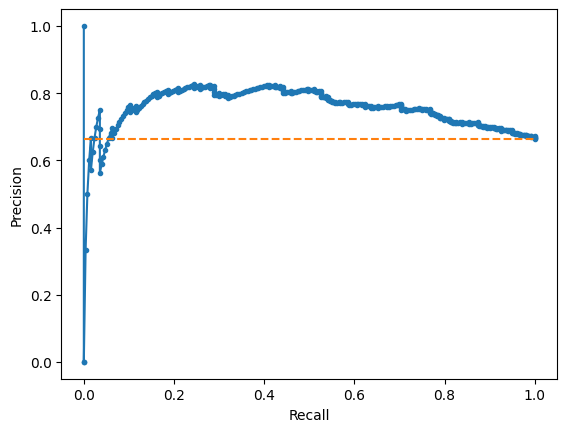

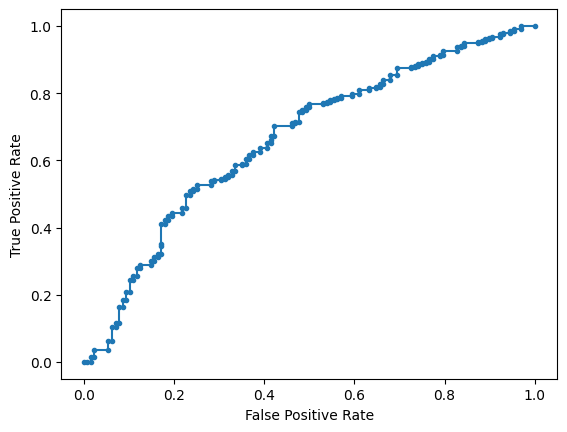

Accuracy: 67.45% Precision: 67.97% Recall: 96.44%
F1: 79.74% MCC: 0.1336
AUPRC: 75.41% AUROC: 66.20%
 accuracy [67.45406824146981]
 precision [67.96657381615599]
 recall [96.44268774703558]
 F1 [79.73856209150327]
 MCC [0.133622844340031]
 AUPRC [75.40962480214405]
 AUROC [66.2024456521739]
2023-04-29 15:28:37.711491


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 66.83% std 1.50
 precision mean 69.66% std 2.11
 recall mean 84.43% std 7.21
 F1 mean 76.15% std 2.60
 MCC mean 0.2332 std 0.0539
 AUPRC mean 73.48% std 2.91
 AUROC mean 65.46% std 2.51
 accuracy [[68.05194805194805], [68.01007556675063], [63.83561643835617], [66.75392670157068], [65.1595744680851], [67.86632390745501], [66.49874055415617], [68.63270777479893], [66.02739726027397], [67.45406824146981]]
 precision [[71.64750957854406], [69.32153392330383], [70.042194092827], [70.12987012987013], [68.45878136200717], [72.22222222222221], [71.16788321167883], [70.625], [65.01766784452296], [67.96657381615599]]
 recall [[79.23728813559322], [91.08527131782945], [73.12775330396477], [86.05577689243027], [81.62393162393163], [79.59183673469387], [78.3132530120482], [90.76305220883533], [88.03827751196172], [96.44268774703558]]
 F1 [[75.25150905432595], [78.72696817420434], [71.55172413793103], [77.28085867620752], [74.46393762183237], [75.72815533980582], [74.56978967495219], 